# Исследование для интрнет-магазина видеоигр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Цель исследования:
1. Составить портрет пользователя каждого региона.
2. Определить факторы влияющие на успешность игры.
3. Сформировать данные для планирования рекламной кампании.

Ход исследования:
   - Обзор данных
   - Предобработка данных
   - Проведение анализа популярности игр (по жанрам и платформам)
   - Составления портрета пользователей по регионам
   - Проверка гипотез
   - Общий вывод

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as st
import seaborn as sns

### Загрузка данных

Счиатем данные с помощью библиотеки Pandas.

In [2]:
# считываем файл с данными
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

data.to_csv('games.csv')

Выведем первые 10 строк и общую информацию датафрейма `data`.

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Отметим  интересные моменты:
- Столбцы не приведены к хорошему стилю
- В столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating` имеются пропуски в данных.
- Столбцы `Year_of_Release`, `User_Score` имеют неверный тип данных.

Построим общую гистограмму для всех чиловых столбцов таблицы.

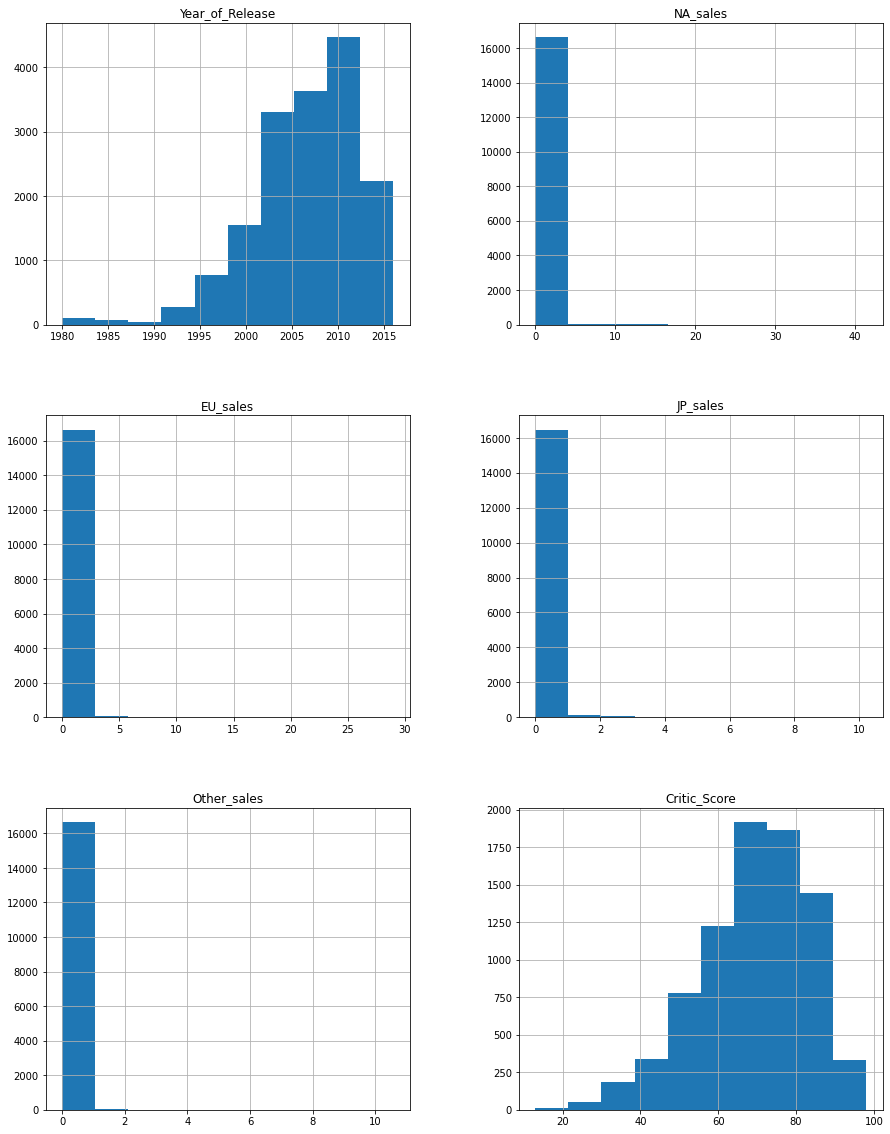

In [5]:
data.hist(figsize=(15, 20))
plt.show()

Обратим внимание:

Поля с информацией по продажам показывают, что данные там находятся относительно в узком диапазоне в зависимости от региона. Это неудивительно, т.к. данные в этих полях измеряются в миллионах. Есть выбросы с правой стороны графиков, это продажи наиболее успешных игр.

Столбец с годами выпуска игр показывает как увеличивается объем игр с каждым годом.

Столбец с оценками пользователей показывает, что пользователи в основном оценивают игры выше среднего.

**Вывод:** Мы выгрузили ифномацию в датафрейм `data`. Каждая строка обозначает отдельную игру и данные о ней. Дальше мы провели обзор датафрейма и составили первые шаги для предобработки данных.

- Поменять названия столбцов
- Обработать пропуски
- Поменять типы данных где это необходимо

### Предобработка данных

#### Стиль заголовков

Выведем на экран перечень столбцов.

In [6]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Все столбцы не соответсвуют хорошему стилю из-за заглавных букв. Приведем все названия к нижнему регистру и сделаем проверку.

In [7]:
data = data.rename(columns={i : i.lower() for i in data.columns})
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Все верно.

#### Обработка пропусков

Выведем количество пропущенных значений.

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Посмотрим долю пропусков:

In [9]:
pd.DataFrame(round(data.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')

,0
critic_score,51.300000
rating,40.500000
user_score,40.100000
year_of_release,1.600000
name,0.000000
genre,0.000000
platform,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000


В столбцах `name` и `year_of_release` находится очень малая доля пропусков. Рассмотрим их подробнее и если не найдем замену, удалим их.

##### Столбец `name`

In [10]:
# строки с пропущенными названиями игр
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего две строки с играми от 1993 года без оценок и рейтинга. Вероятно произошла ошибка при чтении названия игры (например присутствовали символы из другой кодировки). Заменить эти данные мы не можем. Удалим эти строки.

In [11]:
data = data.dropna(subset=['name'])

# проверим пропуски
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

##### Столбец `year_of_release`

In [12]:
# строки с пропущенными годами выпуска игр
data[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Имеем 269 пропусков. Они не связаны ни с названиями игр, ни с платформой, ни с жанром. Вероятнее всего в источнике откуда бралась информация, не было этой информации. Логически заменить эти данные мы не можем их их достаточно мало (1.6%), поэтому удалим их.

In [13]:
data = data.dropna(subset=['year_of_release'])
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

##### Столбцы `critic_score`, `user_score`, `rating`.

Мы имеем множество пропусков в столбцах `critic_score`, `user_score`, `rating`. Построим тепловую карту пропусков, чтобы выявить их связь.

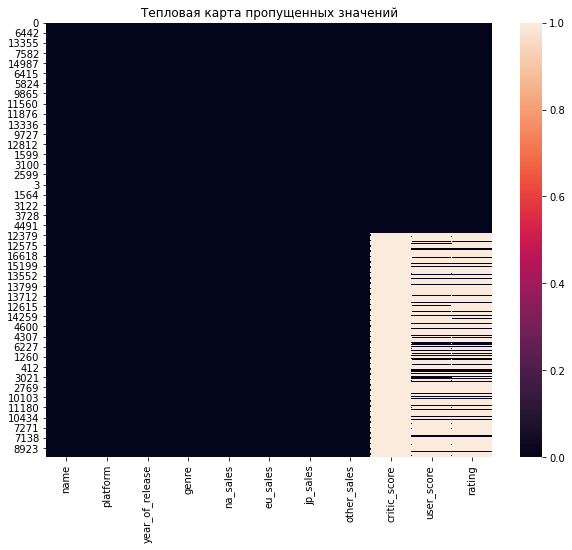

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isna().sort_values(by='critic_score'))
plt.title('Тепловая карта пропущенных значений')
plt.show()

Как мы видим, пропуски находятся почтив одних и тех же позициях. Некоторые игры, на некоторых платформах могут не оцениваться, т.к. являются полными переносами с другой платформы. Старые игры могут не оцениваться по причине малого количества игровых ревьюеров и аггрегаторов оценок в то время. Пропусков слишком много, и найти замену мы не можем. Оставляем столбец `ctitic_score` как есть. 

Столбец `user_score` имеет строковый тип данных, хотя предпологает числовой. Вероятно там находятся значения отличающиеся от числовых. Проверим.

In [15]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Действительно, пристутствует значение 'tbd', что означает To Be Determined, то есть "Будет определено". Обычно оно ставится у игр, которые не оценили достаточное количество пользователей, и оценка в данный момент неизвестна. Проверим количество строк с эти значением.

In [16]:
data[data['user_score'] == 'tbd']['name'].count()

2376

2376 значений. Удалять эти строки нам не нужно, поэтому преобразуем значение 'tbd' в NaN, т.к. дальше понадобится изменить тип столбца на числовой. Пропуски в этом столбце также оставляем, т.к. их слишком много и заменить их мы не можем.

In [17]:
data.loc[data['user_score']=='tbd', 'user_score'] = np.NaN

Проверим неопределенные значения в столбце `rating`.

In [18]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

In [19]:
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Узнаем что значит каждая из маркировок:

- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- K-A: Для детей (устарел)

Т.к. ESRB это организация действующая в пределах Северной Америки основанная в 1994 году, много игр вышедших задолго до основания организации, либо не выходящие на территории США и Канады не оцениваются этим рейтингом. Так же не оцениваются игры с онлайновой частью т.к. их содержание может зависеть от других игроков. Заменим значения Nan на unknown, чтобы не потерять эти данные при анализе игр по рейтингам.

Значение RP можно заменить на unkwown, т.к. фактически этот рейтинг ничего не значит. Проверим сколько таких строк в таблице.

In [20]:
data[data['rating']=='RP']['name'].count()

1

Только одная игра имеет такой рейтинг. Заменим на NaN

In [21]:
data.loc[data['rating']=='RP', 'rating'] = 'Unknown'

In [22]:
data['rating'] = data['rating'].fillna('Unknown')

Проверим наши пропуски.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


По итогу обработки пропусков мы удалили 271 строку, что является 1.62 % от исходных данных. Считаем это допустимым.

#### Изменение типов данных

Выведем информацию обо всех типах данных столбцов.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Преведем столбец `year_of_release` к типу данных int32, т.к. название года - целое число и тем самым мы сэкономим память.

Столбец `user_score` приведем к вещественному типу данных.

In [25]:
data['year_of_release'] = data['year_of_release'].astype('int32')
data['user_score'] = data['user_score'].astype(float)

# проверим
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Типы данных столбцов изменили.

#### Обработка дубликатов

Проверим таблицу на наличие яввных дубликатов.

In [26]:
data.duplicated().sum()

0

Явных дубликатов нет.

Проверим наличие дубликтов по столбцам `name`, `platform`, `year_of_release`, `genre`.

In [27]:
data[data.duplicated(subset=['name', 'platform', 'year_of_release', 'genre'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


Нашли один дубликат. Проверим все строки с этой игрой.

In [28]:
data[(data['name'] == 'Madden NFL 13') & (data['platform'] == 'PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Действительно имеется дубликат отличающийся только продажами в европе. Сложим эти продажи и удалим последнюю строку.

In [29]:
data.loc[604, 'eu_sales'] += data.loc[16230, 'eu_sales']
data = data.drop(labels = [16230],axis = 0).reset_index(drop=True)

# еще раз проверим дубликаты
data[data.duplicated(subset=['name','platform', 'year_of_release', 'genre'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Дубликаты по столбцам `name`, `platform`, `year_of_release`, `genre` отсутствуют.

Проверим неявные дубликаты в строковых столбцах, кроме `name`. Игр слишком много и мы не сможем найти в нем все дубликаты, если они есть. Скорее всего данные используемые в таблице не вводились вручную и наличие дубликатов маловероятно. Проверим только столбцы `platform`, `genre`. В столбце `rating` мы уже убедились, что все в порядке.

In [30]:
# столбец platform
data['platform'].value_counts()

PS2     2127
DS      2121
PS3     1305
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Неявных дубликатов и аномалий нет.

In [31]:
# столбец genre
data['genre'].value_counts()

Action          3307
Sports          2305
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Неявных дубликатов и аномалий нет.

#### Обработка аномальных значений.

Выведем информацию обо всех числовых полях таблицы.

In [32]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,7982.000000,7462.000000
mean,2006.485921,0.264028,0.145939,0.078492,0.047597,68.992608,7.126548
std,5.875546,0.818400,0.506731,0.311109,0.188011,13.920049,1.499429
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Все значения находятся в пределах нормы и их можно объяснить логически. Проверять подробнее не будем.

#### Добавление нового столбца

Добавим столбец с суммарными продажами во всех регионах.

In [33]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

#проверка
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknown,28.31


**Вывод.** В процессе предобработки данных были проведены следующие действия:
- Все названия столбцов были приведены к хорошему стилю
- В столбцах `name` и `year_of_release` были удалены пропуски
- В столбце `user_score` значение 'tbd' заменено на NaN
- В столбце `rating` значение 'RP' заменено на NaN
- Удалены дубликаты по столбцам `name`, `platform`, `year_of_release`, `genre`
- Изменили типы столбцов `year_of_release` и `user_score` на целочисленный и вещественный
- Добавили столбец `total_sales` с суммарными продажами игры

### Исследовательский анализ данных

#### Количество игр по годам

Построим столбчатую диаграмму по нашему датасету. Для полноты картины преобразовывать его не будем. Нам нужны все выпуски игр на всех платформах.

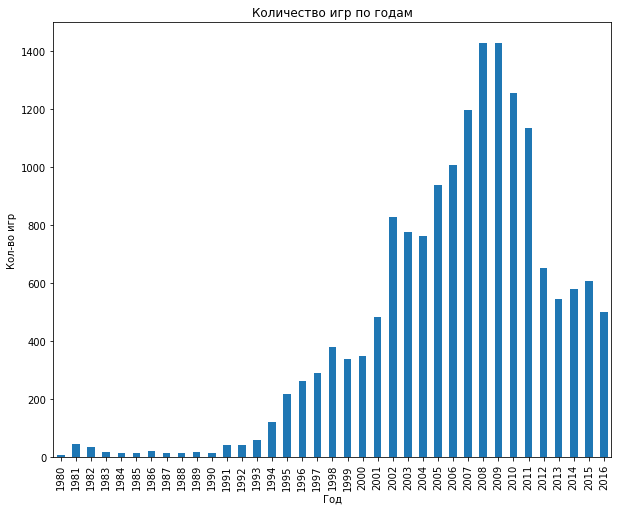

In [34]:
data.groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(10,8))
plt.title('Количество игр по годам')
plt.xlabel('Год')
plt.ylabel('Кол-во игр')
plt.show()

**Вывод:** По графику видим, что до 1995 года выпускалось менее 200 игр. C 1995 видим увеличение количества игр, в это время была выпущена игровая приставка Playstation, которая стала очень популярной. В следующие года начал активно развиваться консольный и компьтерный гейминг, выходят приставки нового поколения, игры становятся технологичными и качественными и вплоть до 2008 года включительно количество игр выростало большими темпами. На 2007 и 2008 год приходит пик разработки видеоигр. Дальше идет очень резкий спад. Вероятнее всего это связано с мировым финансовым кризисом 2008 года. Уменьшение платежеспособной аудитории, безработица,  падение акций компаний и следующее за этим закрытие студий и снижение качества игр - все это повлияло на количество выпускаемых игр.

Для составления плана продаж нам приоритетнее брать данные начиная с 2012 года, именно с этого года падение стабилизировалось и количество игр держится примерно на одном уровне.

#### Продажи по платформам

Выведем платформы по сумме продаж:

In [35]:
data.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Для исследования мы возьмем первые 6 игровых платформ. Туда входят первые 3 платформы от Sony (PS, PS2, PS3), одна от Microsoft (X360) и две от Nintendo (Wii, DS). На основе них изучим жизненный цикл консолей. Построим распределенияя для них.

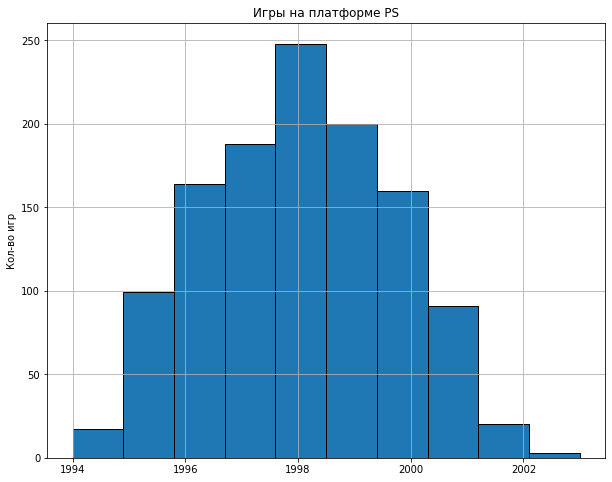

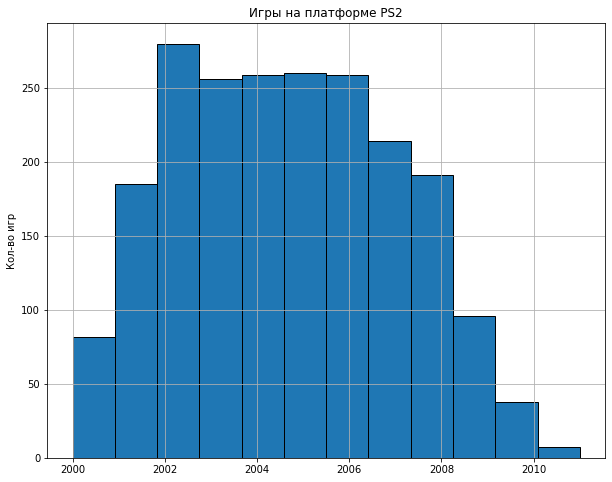

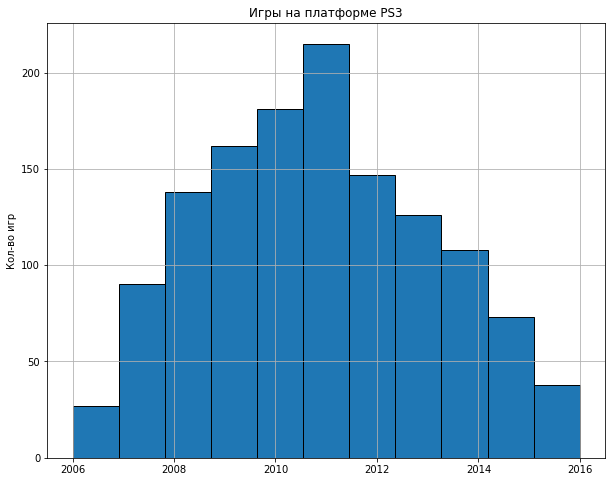

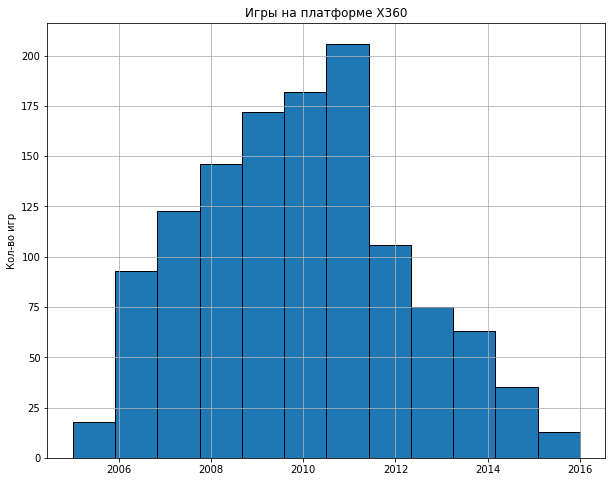

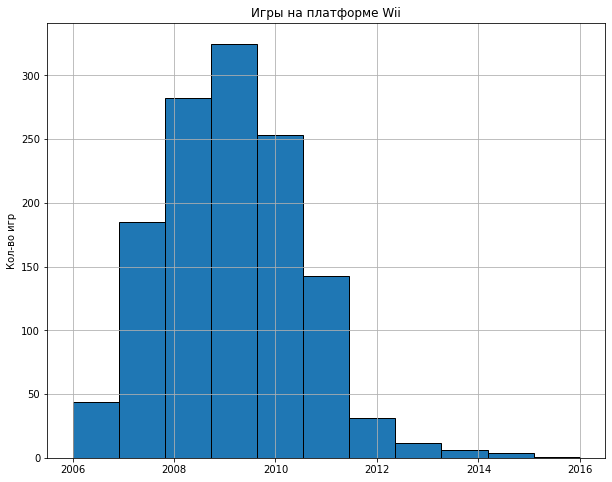

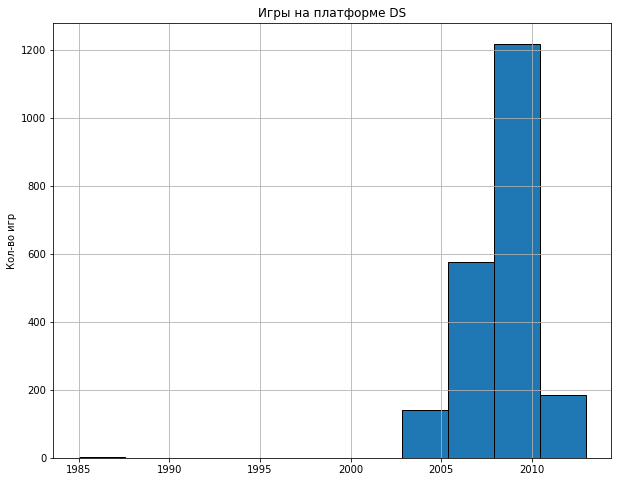

In [36]:
for i in ['PS', 'PS2', 'PS3', 'X360', 'Wii', 'DS']:
    (data[data['platform'] == i]['year_of_release']
    .hist(bins=len(data[data['platform'] == i]['year_of_release'].unique()), figsize=(10,8), edgecolor='black'))
    plt.ylabel('Кол-во игр')
    plt.title('Игры на платформе ' + i)
    plt.show()

Видим выброс на графики с продажами игр на DS в районе 1985 года. Данная консоль была выпущена в 2004 году. Проверим что это.

In [37]:
data[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,Unknown,0.02


Данная игра в японскую игру "Сёги" была выпущена в Токийском университете задолго до выпуска консоли DS и оказалась в наборе данных по ошибке. Удалим эту строку.

In [38]:
data = data.drop(labels = [15957]).reset_index(drop=True)

Построим распределение для DS еще раз.

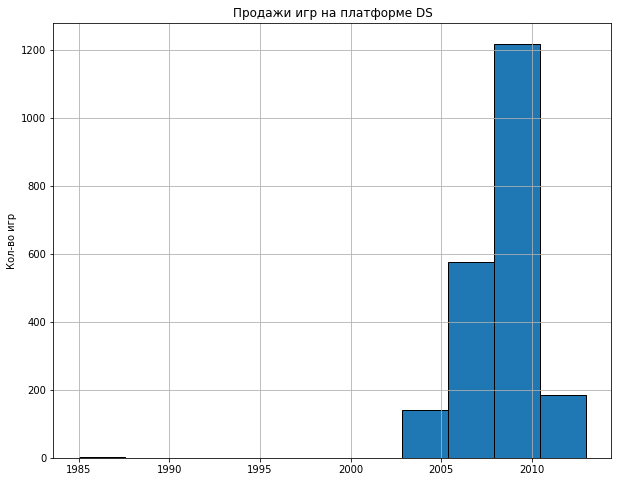

In [39]:
(data[data['platform'] == 'DS']['year_of_release']
.hist(bins=len(data[data['platform'] == 'DS']['year_of_release'].unique()), figsize=(10,8), edgecolor='black'))
plt.ylabel('Кол-во игр')
plt.title('Продажи игр на платформе DS')
plt.show()

Теперь приступим к анализу графиков. Выводы которые мы можем сделать:
- Полный срок жизни платформы от 9 до 12 лет.
- В основном данные распределены нормально, что говорит о том, что пик по выпуску игр на платформе стремится к половине её срока жизни.
- На примере приставок PS, PS2, PS3 мы можем увидеть, что за спадом выпуска игр для  платформы идет выход консоли нового поколения.

Дальше для составления прогноза на 2017 год будем анализировать данные начиная с 2012 года, т.к. эти данные более точно отражают действительность. Брать период раньше нет смылса, т.к. игровая индустрия с 2008 по 2011 включительно переживала резкий спад в связи с мировым финансовым кризисом.
Выведем продажи всех платформ в данный период.

In [40]:
# создадим новый фрейм с актуальными данными
data_new = data[data['year_of_release'] >= 2012]

# вывод продаж
data_new.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Из них возьмем первые 5 платформ, таким образом затронем платформы старого поколения (PS3, X360) и нового (PS4, 3DS, XOne). Создадим свод продаж по году и платформе и построим из него график.

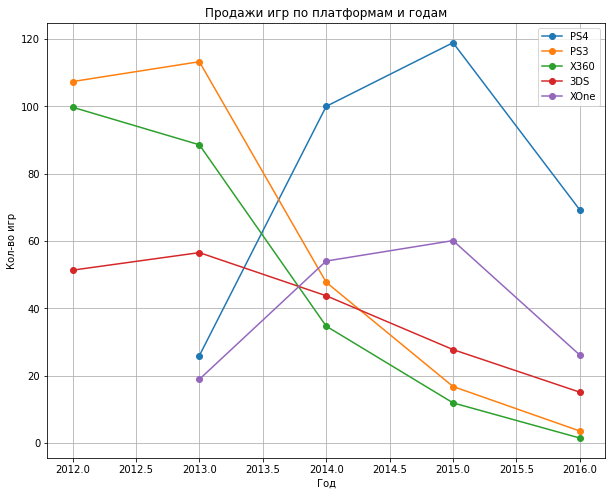

In [41]:
for i in ['PS4', 'PS3', 'X360', '3DS', 'XOne']:
    (data_new[data_new['platform'] == i]
     .groupby('year_of_release')['total_sales'].sum()
     .plot(x='year_of_release', y = 'total_sales', grid=True, figsize=(10,8), style='o-', legend=True))
plt.legend(['PS4', 'PS3', 'X360', '3DS', 'XOne'])
plt.ylabel('Кол-во игр')
plt.xlabel('Год')
plt.title('Продажи игр по платформам и годам')
plt.show()

Видим, что идет спад продаж на всех платформах. Но на консолях старого поколения (PS3, X360) падение продаж продаж происходит с начала 2012 года, т.к. эти консоли уже утрачивают свою популярность. 


Консоли нового же поколения (PS4, XOne) вышли в 2013 году и сразу начали наращивать темп по продажам. Падение в 2016 году можно объяснить неполнотой картины в наборе данных, возможно упущены релизы с конца года. Но тем не менее плтаформы нового поколения более перспективны в ближайшем будущем. Мы только приближаемся к их пику. 

Портативная консоль 3DS же была выпущена в 2011 году и не оправдала ожиданий по продажам и была не очень популярной. Предположительно люди начали переходить на мобильный гейминг (из-за этого прекратили существование линейка портативных консолей от Sony). Из-за этого продажи игр падали из года в год.

Теперь построим диаграмму размаха продаж игр по годам на каждой из этих платформ. С помощью нее найдем выбросы и узнаем в какие года были основыне продажи на платформе, и в какие незначительные.

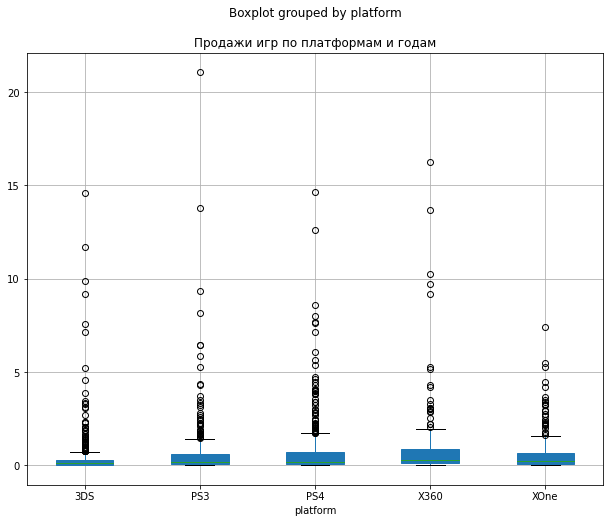

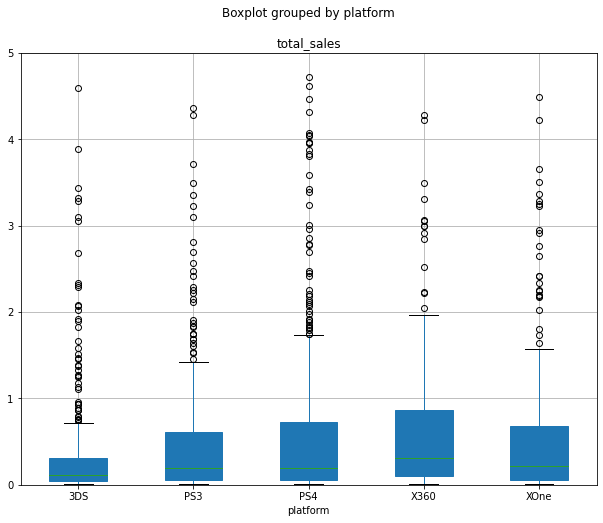

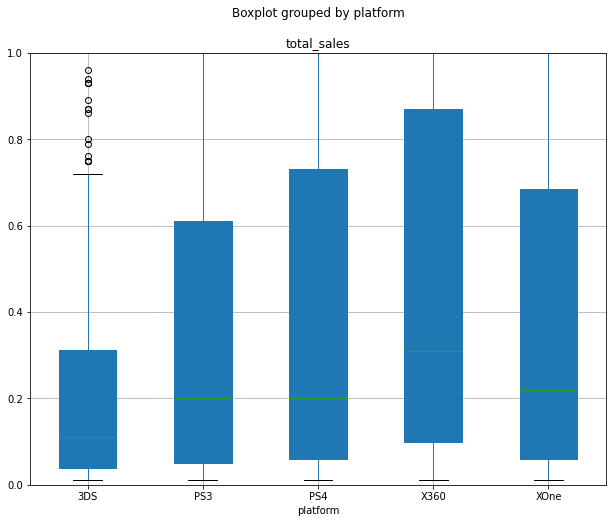

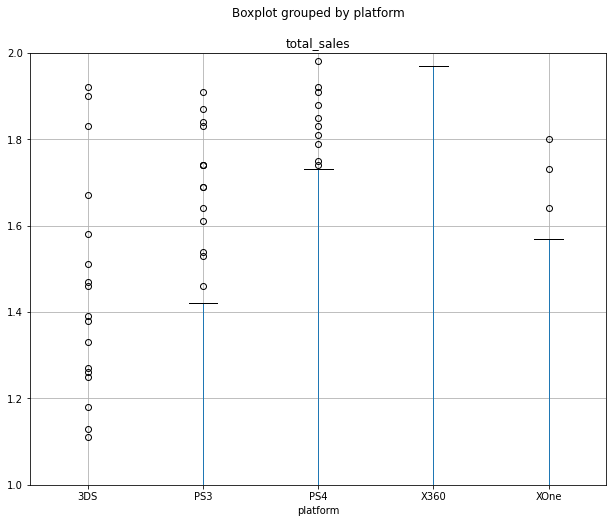

In [42]:
(data_new[data_new['platform'].isin(['PS4', 'PS3', 'X360', '3DS', 'XOne'])]
.boxplot('total_sales', by='platform', grid=True, figsize=(10,8), patch_artist = True))
plt.title('Продажи игр по платформам и годам')

# от 0 до 5 млн проданных копий
(data_new[data_new['platform'].isin(['PS4', 'PS3', 'X360', '3DS', 'XOne'])]
.boxplot('total_sales', by='platform', grid=True, figsize=(10,8), patch_artist = True))
plt.ylim(0,5)

# от 0 до 1 млн проданных копий
(data_new[data_new['platform'].isin(['PS4', 'PS3', 'X360', '3DS', 'XOne'])]
.boxplot('total_sales', by='platform', grid=True, figsize=(10,8), patch_artist = True))
plt.ylim(0,1)


# от 1 до 2 млн проданных копий
(data_new[data_new['platform'].isin(['PS4', 'PS3', 'X360', '3DS', 'XOne'])]
.boxplot('total_sales', by='platform', grid=True, figsize=(10,8), patch_artist = True))
plt.ylim(1,2)
plt.show()

На данных диаграммах видим, что глобальные продажи игр в основном находятся в пределах от 100 до 900 тыс.проданных копий для основных платформ (PS и XBOX) и от 50 до 350 тыс. копий для 3DS (причины таких низких продаж мы описывали выше).
Игры продающиеся больше 2 млн копий появляются довольно нечасто. Выбросы на графиках это однозначно самые продаваемые игры для своей платформы.

Медиана находится примерно на одном уровне до 200 - 300 тыс. проданных копий, значит половина игр продается до этого количества, хотя разброс значений достаточно большой. 

**Вывод:** Проанализировав период 2012 - 2016 мы можем говорить, о том что платформы нового поколения (PS4 и XOne) быстро зарабатывают себе аудиторию. На данный момент PS4 является неоспоримым лидером по продаже игр, в то же время XOne не может обогнать по суммарным продажам X360 за изучаемый период, но мы видим тенденцию роста продаж на новых платформах и спад на старых.

Старое поколение консолей и портативные консоли перестают быть актуальными, из-за прихода новых консолей и мобильного гейминга.

PC не зашел ни в один из наших топов, что говорит о том что основные продажи игр идут через консоли. Это может быть связяно с отсутствием пиратства на них.

#### Взаимосвязь продаж и отзывов

Данную связь будем изучать на примере PS4 самой популярной платформы в изучаемом периоде. 

Построим матрицу корреляций, и далее рассмотим эти зависимости на диаграммах рассеяния.

In [43]:
data_new[data_new['platform'] == 'PS4'][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


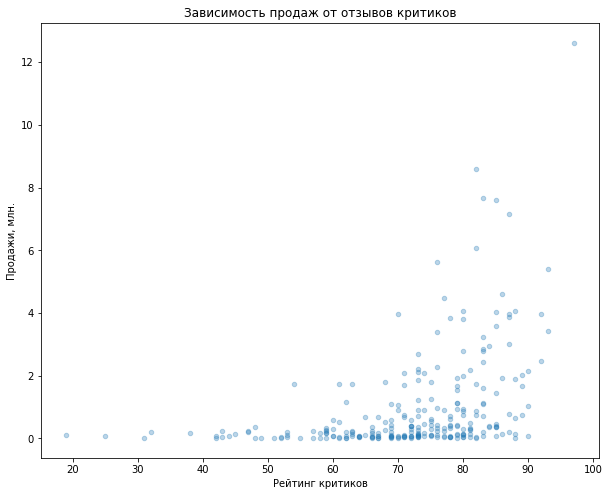

In [44]:
# график зависимости продаж от отзывов критиков
data_new[data_new['platform'] == 'PS4'].plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10,8), alpha=0.3)
plt.title('Зависимость продаж от отзывов критиков')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи, млн.')
plt.show()

Видим слабую положительную связь между продажами игр и оценками критиков. Отзыв игрового журналиста не является определяющим параметром для покупки игры.

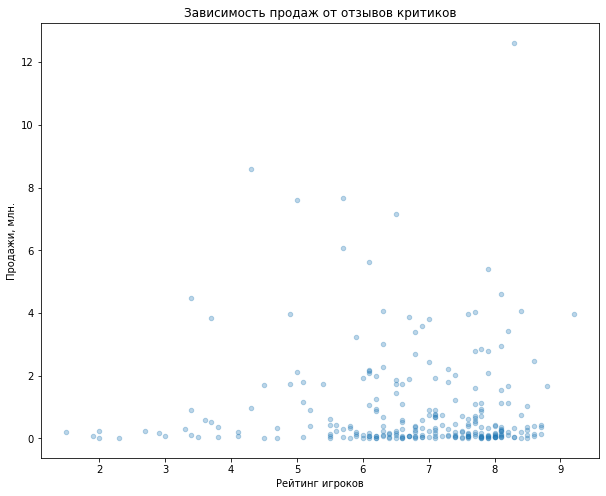

In [45]:
# график зависимости продаж от отзывов критиков
data_new[data_new['platform'] == 'PS4'].plot(x='user_score', y='total_sales', kind='scatter', figsize=(10,8), alpha=0.3)
plt.title('Зависимость продаж от отзывов критиков')
plt.xlabel('Рейтинг игроков')
plt.ylabel('Продажи, млн.')
plt.show()

Точки в графике разбросаны достаточно беспорядочно. Связи между оценками пользователей и продажами игр нет никакой. Об этом говорит нам и матрица корреляций. Можно считать что при покупке игры люди не считаются с мнением аудитории игры. Возможно дело в том, что каждый из них не считает другого авторитетом.

Проверим выводы на остальных 4-х платформах из ТОП-5.

In [46]:
# матрица корреляций для PS3
data_new[data_new['platform'] == 'PS3'][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.334166,-0.006218
critic_score,0.334166,1.000000,0.544510
user_score,-0.006218,0.544510,1.000000


In [47]:
# матрица корреляций для X360
data_new[data_new['platform'] == 'X360'][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.360573,0.006164
critic_score,0.360573,1.000000,0.557352
user_score,0.006164,0.557352,1.000000


In [48]:
# матрица корреляций для 3DS
data_new[data_new['platform'] == '3DS'][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.320803,0.197583
critic_score,0.320803,1.000000,0.722762
user_score,0.197583,0.722762,1.000000


In [49]:
# матрица корреляций для XOne
data_new[data_new['platform'] == 'XOne'][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


Как видим ситуация на остальных платформах примерно одинаковая. На 3DS мы можем увидеть относительно высокую связь между отзывами пользователей и продажами. Возможно это связяно с исключительностью самой консоли и выпускаемых на ней игр. В основном это эксклюзивы только для этой платформы, они менее известны в широком кругу и люди больше склонны полагаться на мнение других игроков, т.к. их гораздо меньше, а значит меньше фрода в оценках.

**Вывод:** На всех крупных платформах оценки критиков и продажи игры имеют слабую положительную связь. Это значит, что оценки критиков не являются определяющим параметром для покупки игры, но люди обращают на него внимание, возможно это связано с тем, что люди отчасти прислушиваются к мнению авторитетных журналистов, но не настолько чтобы не получить самому удовольствие от игры.

А вот между оценками пользователей и продажами игры нет никакой связи. Предпологаем, что при покупке игры люди не смотрят на мнение других пользователей.

#### Количество игр по жанрам

Построим распределение игр по жанрам.

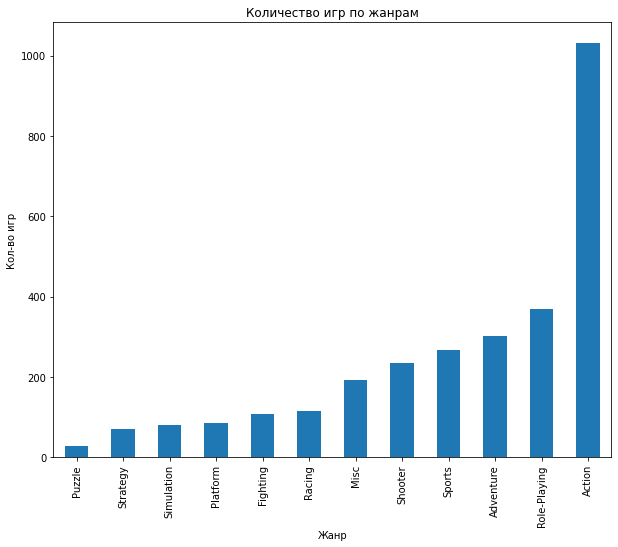

In [50]:
data_new.groupby('genre')['name'].count().sort_values().plot(kind='bar', figsize=(10,8))
plt.title('Количество игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Кол-во игр')
plt.show()

Самым популярным жанром является Action. Именно в этом жанре находятся самые популярные серии (GTA, Assassin's Creed и т.д.). Игры этого жанра могут сочетать в себе элементы из других жанров (ролевые элементы, гонки, пазлы и т.д.), являются досутпными для всех. Дальше идут ролевые игры и приключенческие (поджанр Action).

Самые непопулярные жанры - это паззлы, страгтегии и симуляторы. Эти жанры более нишевые, имеют более высокий порог вхождения, эти игры приносят меньше денег. Стратегии, например, выходят преимущественно на PC из-за особенностей управления.

Теперь посмотрим прибыльность каждого жанра. Для этого построим диаграммы размаха для каждого из них.

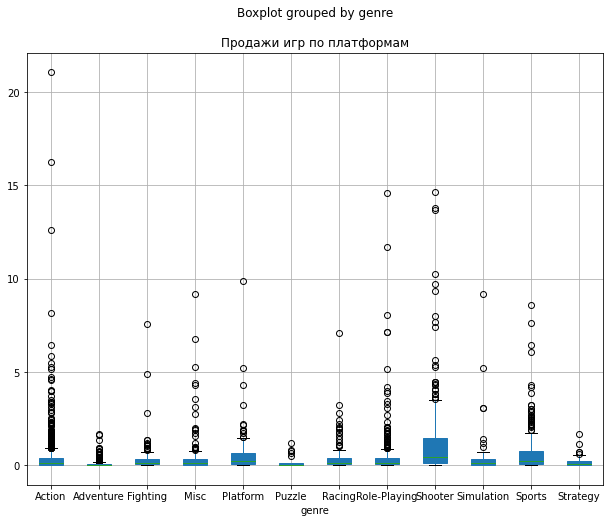

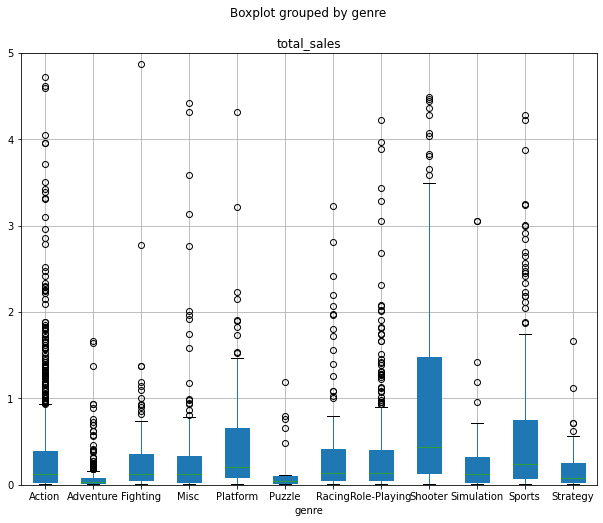

In [51]:
(data_new.boxplot('total_sales', by='genre', grid=True, figsize=(10,8), patch_artist = True))
plt.title('Продажи игр по платформам')

(data_new.boxplot('total_sales', by='genre', grid=True, figsize=(10,8), patch_artist = True))
plt.ylim(0,5)

plt.show()

In [52]:
print('Топ-10 игр в жанре Sports')
print(data_new.query('genre == "Sports"').groupby('name').agg({'total_sales':'sum'})
          .sort_values(by='total_sales', ascending=False)[:10])
print('\nТоп-10 игр в жанре Shooter')
print(data_new.query('genre == "Shooter"').groupby('name').agg({'total_sales':'sum'})
          .sort_values(by='total_sales', ascending=False)[:10])
print('\nТоп-10 игр в жанре Platform')
print(data_new.query('genre == "Platform"').groupby('name').agg({'total_sales':'sum'})
          .sort_values(by='total_sales', ascending=False)[:10])
print('\nТоп-10 игр в жанре Adventure')
print(data_new.query('genre == "Adventure"').groupby('name').agg({'total_sales':'sum'})
          .sort_values(by='total_sales', ascending=False)[:10])

Топ-10 игр в жанре Sports
               total_sales
name                      
FIFA 15              17.37
FIFA 14              16.46
FIFA 16              16.30
FIFA 17              11.48
NBA 2K16              7.98
Madden NFL 16         7.40
Madden NFL 15         7.26
NBA 2K15              7.15
NBA 2K14              6.97
Madden NFL 13         6.45

Топ-10 игр в жанре Shooter
                                total_sales
name                                       
Call of Duty: Black Ops II            29.40
Call of Duty: Ghosts                  27.39
Call of Duty: Black Ops 3             25.67
Call of Duty: Advanced Warfare        21.97
Battlefield 4                         13.94
Destiny                               12.54
Star Wars Battlefront (2015)          12.19
Halo 4                                 9.71
Far Cry 4                              8.50
Far Cry 3                              7.31

Топ-10 игр в жанре Platform
                             total_sales
name                    

Видим что самым прибыльным жанром является Shooter (75% игр этого жанра продаются тиражом до 1.5 млн. копий). Shooter является менее популярным жанром у разработчиков игр, чем РПГ и спортивные игры, но продается более успешно. Это можно объяснить тем, что в этом жанре выходят достаточно популярные серии игр (Call of Duty, Battlefield, Far Cry), которые выходят каждый год и продаются огромными тиражами. В этом жанре сложно изобрести что либо новое (игры из топ-10 шутеров объединяет вид от первого лица, строго боевая составляющая, наличие мультиплеера, сюжетная кампания про войну в том или ином виде), и разработчики не тянутся создавать игры в нем.

Также можно отметить жанры Sports и Platform. По ним выходят не так много игр, что объясняется нишевостью жанорв, но большинство этих игр продаются достаточно высокими тиражами. В жанре спортивных игр локомотивами являются FIFA, NBA, NFL. Эти игры выходя ткаждый год и пользуются большой популярностью.

В жанре Action наоборот выходят много игр, но 75% игр имеет продажи меньше 500 тысю копий.

Также интересно что жанр Adventure находится в топ-3 по выпуску игр, но находится на одном из последних мест по продажам. Это говорит о том, что игры этого жанра находят большой отклик у разработчиков, но не у игроков. Игры этого жанра достаточно разнообразны каждая из них может похвастаться определенной механикой, но они не имеют той динамики, которая есть у популярных жанров. Топ-10 игр в жанре Adventure подтверждают это (Minecraft, The Walking Dead)

В жанре Puzzle выходят мало игр, которые не пользуются особым успехом. Они имеют достаточно узкую аудиторию.

**Вывод:** Самые продаваемые жанры: Shooter, Sports, Platform. Игры в жанре Action, занимают самую большую часть рынка, но большинство из них не продаются большими тиражами. В то же время шутеры имеют очень популярные серии которые выпускаются каждый год, и игры продаются огромными тиражами.

Самые непродаваемые жанры: Puzzle, Adventure. 

**Общие выводы:** 
1. Для дальнейшего анализа берем период 2012 - 2016 г.
2. Основные продажи в перспективе приходятся на консоли нового поколения (PS4, XOne). Темпы продаж игр растут с момента выхода в 2013 году.
3. Консоли старого поколения отходят на второй план. Выпускаются меньше игр, падают продажи.
4. Продажи на ПК сильно отстают от консолей.
5. Портативные консоли становятся неактуальными из-за появления мобильного гейминга.
6. Продажи игр слабо связаны с оценками критиков.
7. Продажи игр не связаны с оценками игроков.
8.  - Самые продаваемые жанры: Shooter, Sports, Platform. 
    - Самые непродаваемые: Puzzle, Adventure.

### Портрет пользователя каждого региона

Исследуем данные по продажам в трех регионах - NA (Северная Америка), EU (Европа), JP (Япония). Это основные рынки для видеоигр. Для каждого региона составим портрет пользователя. 

Начнем с популярности платформ. Сгруппируем данные по платформам и рассчитаем продажи игр по регионам, возьмем у каждого региона топ-5 платформ.

In [53]:
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    print('Топ 5 платформ в регионе', i[:2].upper())
    print(data_new.groupby('platform')[i].sum().sort_values(ascending=False)[:5], '\n\n')

Топ 5 платформ в регионе NA
platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64 


Топ 5 платформ в регионе EU
platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64 


Топ 5 платформ в регионе JP
platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64 




В Северной Америке и Европе в топе находятся одни и те же консоли, только в разном порядке. В Америке на первом месте стоит X360 с самыми большими продажами игр. Это может быть связано с тем, что X360 ориентирована была прежде всего на американский рынок и предлагает там больше возможностей и сервисов. В то же время PS ориентирована на международный рынок и может сервисов там и было меньше, большинство из них были локализованы во многих странах. Дальше идут консоли PS двух версий, новая XOne и замыкает пятерку портативная 3DS.

В Европе первые места занимают консоли компании Sony, что подтверждает теорию о том что эта компания ориентируется в первую очередь на международный рынок. После них идут консоли Microsoft  как наиболее близкая альтернатива и в конце находится 3DS.

В Японии очевидно предпочитают играть на отечетсвенных консолях. Причем в топе находятся сразу два представителя мира портативных консолей 3DS и PS Vita. PS3 по продажам игр обходит PS4 в два раза. Так же в топе находится WiiU, предлагающий опыт отличающийся от остальных консолей.

Теперь выведем самые популярные жанры:

In [54]:
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    print('Топ 5 жанров в регионе', i[:2].upper())
    print(data_new.groupby('genre')[i].sum().sort_values(ascending=False)[:5], '\n\n')

Топ 5 жанров в регионе NA
genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64 


Топ 5 жанров в регионе EU
genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64 


Топ 5 жанров в регионе JP
genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64 




В топах Европы и Америки на первых местах стоят экшны и шутеры. Их продажи сильно превосходят следующих по списку. Дальше идут спортивные и ролевые игры. И замыкают 5-ку в Америке игры с жанрами разного толка, которым не нашлось место в общем списке, а в Европе гонки.

Японский рынок также сильно отличается от американского и европейского. На первом месте стоят РПГ и только после него экшны. Дальше идут игры прочих жанров не представленных в списке. Также здесь популярны жанры, не снискавшие большой словы во всем мире - различные симуляторы и файтинги.

Дальше проверим зависимость продаж от рейтинг ESRB в регионах. Напомним значения маркировок:
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- K-A: Для детей (устарел)


In [55]:
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    print('Рейтинг ESRB по регионам', i[:2].upper())
    print(data_new.groupby('rating')[i].sum().sort_values(ascending=False), '\n\n')

Рейтинг ESRB по регионам NA
rating
M          231.57
E          114.37
Unknown    103.31
E10+        75.70
T           66.02
Name: na_sales, dtype: float64 


Рейтинг ESRB по регионам EU
rating
M          193.96
E          113.03
Unknown     91.50
E10+        55.37
T           52.96
Name: eu_sales, dtype: float64 


Рейтинг ESRB по регионам JP
rating
Unknown    108.84
E           28.33
T           26.02
M           21.20
E10+         8.19
Name: jp_sales, dtype: float64 




Опять же европейский и американский рынок очень схожи. Наибольшей популярностью пользуется игры предназначенные для взрослой аудитории (от 17 лет), дальше идут игры категории для всех, эти игры нейтральны и предназначены как для детей так и для взрослых Дальше идут игры для детей от 10 лет и замыкают списки игры для подростков (от 13 лет). 

Как видим в Японии очень популярны игры без рейтинга, это можно объяснить т.к. японцы предпочитают играть в отечественные игры, для которых ESRB не рассчитан. В Японии игры для для взрослой аудитории менее популярны чем игры для предназначенные для всех возрастов и подростков. Это может быть связано с национальным менталитетом и японцы предпочитаю играть в отечественные серии, которые связаны с героями аниме (Pokemon) и используют мультяшный стиль не предполагающий сцены откровенного насилия. 

**Вывод:** Пользователи из Америки могут играть на разных платформах, но предпочитают X360 несмотря на устарелость. Играют преимущественно в экшны и шутеры, но популярностью пользуются также спортивные и ролевые игры. Препочитают игры для взрослой аудитории либо предназначенные для всех возрастов. 

Пользователи из Европы играют в основном на приставках Sony, но могут и на приставках Microsoft. Играют преимущественно в экшны и шутеры, но популярностью полузуются также спортивные и ролевые игры. Препочитают игры для взрослой аудитории либо предназначенные для всех возрастов. Этим они схожи с американцами.

Игроки из Японии играют исключительно на отечественных платформах, также у них в ходу портативный гейминг. Из жанров предпочитают РПГ и экшны, менее популярны игры самых разных жанров например симуляторы и файтинги. Шутеры у них вообще не популярны. Сформитровать преподчтения по рейтингам сложнее - самые популярные игры для японцев не имеют рейтинга ESRB (не выходят  официально на американский рынок, онлайн-игры). Из остальных релизов, оцениваемых ESRB, Японцы предпочитают игры предназначенные для всех возрастов, подростков и для взрослых.

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Так как проверяем гипотезу о равенстве средних генеральных совокупностей ,то сформулирруем нулевую гипотезу как: Средние пользовательские рейтинги платформ Xbox One и PC равны.

Альтернативная гипотеза тогда будет звучать так: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

Т.к. сравниваем две генеральные совокупности, будем использовать метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: `scipy.stats.ttest_ind`. 
Проверим можно ли использовать данный метод:
1. Эти две генеральные совокупности не зависят друг от друга.

Дальше проверим размер этих выборок

In [56]:
score_xone = data_new.query('platform == "XOne"')['user_score'].dropna()
score_pc = data_new.query('platform == "PC"')['user_score'].dropna()


print(score_xone.count())
print(score_pc.count())

182
206


2. Выборки достаточно велики и выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены близко к нормальному вокруг истинного среднего этой совокупности.
3. Выборки относительно равны по размеру и велики и нет оснований думать что дисперсии разные.

Проверяем гипотезу:

In [57]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(score_xone, score_pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Значение p-value показывает: вероятность случайно получить такое или большее различие равна почти 
55%. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними оценками пользователей.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны.

Проверим размер выборок:

In [58]:
score_action = data_new.query('genre == "Action"')['user_score'].dropna()
score_sports = data_new.query('genre == "Sports"')['user_score'].dropna()


print(score_action.count())
print(score_sports.count())

523
194


Проверим можно ли использовать данный метод:
1. Эти две генеральные совокупности не зависят друг от друга.
2. Выборки достаточно велики и выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены близко к нормальному вокруг истинного среднего этой совокупности.
3. Выборки сильно отличаются друг от друго по размеру и есть основания полагать, что дисперсии выборок отличаются. Поставим параметр `equal_var=False`.

Метод использовать можно. Проверим гипотезу.

In [59]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(score_action, score_sports, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 5.989458066467418e-20
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что cредние пользовательские рейтинги жанров Action и Sports не равны.

**Вывод:** 
1. Имеется большая вероятность что, средние пользовательские оценки пользователей на платформах Xbox One не различаются.

2. Есть основания говорить, что cредние пользовательские рейтинги жанров Action и Sports не равны.

### Общий вывод

В данном проекте мы изучили данные по компьютерным играм с 1980 по 2016 год.

В процессе предобработки данных мы сделали следующие действия:
- Все названия столбцов были приведены к хорошему стилю
- В столбцах `name` и `year_of_release` были удалены пропуски
- В столбце `user_score` значение 'tbd' заменено на NaN
- В столбце `rating` значение 'RP' заменено на NaN
- Удалены дубликаты по столбцам `name`, `platform`, `year_of_release`, `genre`
- Изменили типы столбцов `year_of_release` и `user_score` на целочисленный и вещественный
- Добавили столбец `total_sales` с суммарными продажами игры

В результате исследования выяснили:
1. Для планирования реламной кампании берем период 2012 - 2016 г.
2. Основные продажи в перспективе приходятся на консоли нового поколения (PS4, XOne). Темпы продаж игр растут с момента выхода в 2013 году.
3. Консоли старого поколения отходят на второй план. Выпускаются меньше игр, падают продажи.
4. Продажи на ПК сильно отстают от консолей.
5. Портативные консоли становятся неактуальными из-за появления мобильного гейминга.
6. Продажи игр слабо связаны с оценками критиков.
7. Продажи игр не связаны с оценками игроков.
8.  - Самые продаваемые жанры: Shooter, Sports, Platform. 
    - Самые непродаваемые: Puzzle, Adventure.
    
Позже мы составили портрет пользователя для регионов (NA, EU, JP). Будем учитывать только актуальные платформы.
- NA (Северная Америка)
    - Любимая платформа: PS4
    - Любимые жанры: Action, Shooter
    - Основные возрастные категории: M (для взрослых), E (для всех возрастов)
- EU (Европа)
    - Любимая платформа: PS4
    - Любимые жанры: Action, Shooter
    - Основные возрастные категории: M (для взрослых), E (для всех возрастов)
- JP (Япония)
    - Любимая платформа: 3DS
    - Любимые жанры: Role-Playing, Action
    - Основные возрастные категории: игры преимущественно продаящиеся в этом регионе не оцениваются ESRB. Остальные игры: E (для всех возрастов), T (для подростков), M (для взрослых)
    
 При проверке гипотез сделали следующие выводы:
 
1. Имеется большая вероятность что, средние пользовательские оценки пользователей на платформах Xbox One не различаются.

2. Есть основания говорить, что cредние пользовательские рейтинги жанров Action и Sports не равны.

 Рекомендации для рекламной кампании:
 1. Делать ставку на консоли PS4 и Xbox One.
 2. В рекламных баннерах игр на сайте монжно добавить оценки критиков.
 3. Для оценки перспективности игр не учитывать рейтинги от пользователей.
 3. Для пользователей из Северной Америки и Европы рекомендовать игры на PS4 в жанре Action и Shooter с рейтингом M и E.
 4. Для пользователей из Японии рекомендовать игры для 3DS в жанре Role-Playing и Action с рейтингом E, T и M.
 5. Длякаждого региона учитывать работу местных организаций для присвоения возрастного рейтинга игр.